<a href="https://colab.research.google.com/github/EnFiore/ai-machine-learning-modelli-e-algoritmi/blob/main/3%20-%20Naive%20Bayes/naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gli algoritmi Naive Bayes

In [10]:
from sklearn.datasets import load_iris, make_gaussian_quantiles, make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, classification_report, confusion_matrix
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [11]:
BASE_URL = "https://raw.githubusercontent.com/ProfAI/machine-learning-modelli-e-algoritmi/main/datasets/"
RANDOM_SEED = 0

## Gaussian Naive Bayes

Si basa sull'assunzione che la distribuzione della likewood P(y|X) segua una gaussiana

In [ ]:
from sklearn.naive_bayes import GaussianNB

1. genero data set

classes sono i valori target dei nostri dati

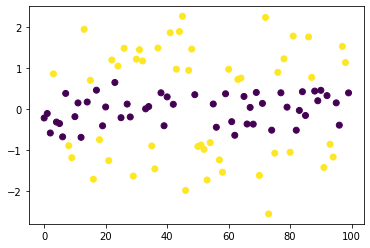

In [ ]:
X, y = make_gaussian_quantiles(n_features=1, n_classes=2, random_state=RANDOM_SEED)
plt.scatter(np.arange(X.shape[0]),X, c=y)

2. si prova a classificare con Logistic Regression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=RANDOM_SEED)

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test) #accuracy media

0.36666666666666664

modello scarso perchè provando calssificazioni a caso avremmo avuto il 50% dipossibilità di azzecare il riusltato in quanto solo due classi)

In [ ]:
y_proba = lr.predict_proba(X_test)
log_loss(y_test, y_proba)

0.7342855504709547

3. Visualizazionie grafica della retta di regressione logistica sulla distribuzione dei dati

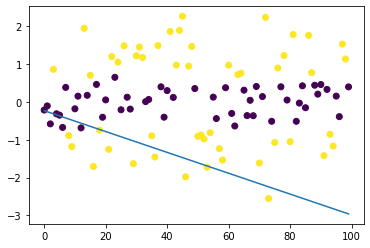

In [ ]:
a = np.arange(X.shape[0])
plt.scatter(a, X, c=y)
plt.plot(a, a*lr.coef_[0]+lr.intercept_)

4. Classificazione con Gaussina Naive Bayes

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb.score(X_test, y_test)

0.9333333333333333

In [ ]:
y_proba = gnb.predict_proba(X_test)
log_loss(y_test, y_proba) # valutare grado di incertezza

0.18879658207548125

## Bernoulli Naive Bayes

Distribuzione è una Bernulliana, descrive eventi binari

Features devono essere binarie

Utile per la classificazione del testo

# Modello che riconosce se sms di spam o no

In [12]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB

In [ ]:
df = pd.read_csv(BASE_URL+"spam_balanced.csv")
df.head()

In [ ]:
sms_list = df["MESSAGE"].tolist()
sms_list[0]

'Horrible bf... I now v hungry...'

Estraggo le parole dal corpus di testo

In [ ]:
"""
poco efficiente perchè due cicli annidiati
def build_vocab(corpus):
  vocab = []
  for text in corpus:
    for word in text.split():
      if word not in vocab:
        vocab.append(word.lower())
  return vocab
"""
#funzione più efficiente
def build_vocab(corpus):
  vocab = set({})
  for text in corpus:
    vocab = vocab.union(set(text.lower().split()))
  return list(vocab)


vocab = build_vocab(sms_list)
vocab[:10]

['comp',
 'santa',
 'age23,',
 'wish',
 'i',
 'sweetheart',
 'largest',
 '08714342399.2stop',
 '07090298926',
 '83383']

valuto se la parola è presente nel corpus

In [ ]:
def binary_bow(corpus, vocab=None):

  if vocab is None:
    vocab = build_vocab(corpus)

  vocab_size = len(vocab)
  sms_occurrences = []

  for sms in sms_list:
    sms_occurrence = [0]*vocab_size
    for i in range(vocab_size):
        sms_occurrence[i] = int(vocab[i] in sms)
    sms_occurrences.append(sms_occurrence)

  return sms_occurrences

sms_bbow = binary_bow(sms_list, vocab=vocab)
sms_bbow[0]

[0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [ ]:
def binary_bow(corpus, vocab=None):

  if vocab is None:
    vocab = build_vocab(corpus)

  vocab_size = len(vocab)
  sms_occurrences = []

  for sms in sms_list:
    sms_occurrence = [0]*vocab_size
    for i in range(vocab_size):
        sms_occurrence[i] = int(vocab[i] in sms)
    sms_occurrences.append(sms_occurrence)

  return sms_occurrences

sms_bbow = binary_bow(sms_list, vocab=vocab)

Creazione modello e valuto

In [ ]:
X = sms_bbow
y = df["SPAM"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=RANDOM_SEED)

In [ ]:
benb = BernoulliNB()
benb.fit(X_train, y_train)
report = classification_report(benb.predict(X_test), y_test)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.92      0.96       155
           1       0.92      0.99      0.96       145

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



In [ ]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
report = classification_report(mnb.predict(X_test), y_test)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.92      0.95       154
           1       0.92      0.99      0.95       146

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.96      0.95      0.95       300



## Multinomial Naive Bayes

Utilizzata per dati multinomiale, cioè in cui si ha indicazione di quanto un valore si ripete es numero di volte che una parola compare in un documento

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
df = pd.read_csv(BASE_URL+"spam_balanced.csv")
df.head()

SPAM                                            MESSAGE
0     0                   Horrible bf... I now v hungry...
1     0                         Dad says hurry the hell up
2     0  I sent lanre fakeye's Eckankar details to the ...
3     0  Can you tell Shola to please go to college of ...
4     0                   I love to wine and dine my lady!

funzione che valuta quante volte una parola compare nel testo

In [ ]:
def bow(corpus, vocab=None):

  if vocab is None:
    vocab = build_vocab(corpus)

  vocab_size = len(vocab)
  sms_occurrences = []

  for sms in sms_list:
    sms_occurrence = [0]*vocab_size
    for i in range(vocab_size):
        sms_occurrence[i] = sms.count(vocab[i]) #conta quante volte la parola occorre nel testo
    sms_occurrences.append(sms_occurrence)

  return sms_occurrences

sms_bow = bow(sms_list, vocab)

In [ ]:
np.array(sms_bow).max()

74

In [ ]:
X = sms_bow
y = df["SPAM"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=RANDOM_SEED)

costruiamo il modello

In [ ]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
report = classification_report(mnb.predict(X_test), y_test)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.91      0.95       156
           1       0.91      0.99      0.95       144

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



prova a usare bernoulli in dati non binomiali ( 0 e 1) ma multinomiali

In [ ]:
benb = BernoulliNB()
benb.fit(X_train, y_train)
report = classification_report(benb.predict(X_test), y_test)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.92      0.96       155
           1       0.92      0.99      0.96       145

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



il risultato è lo stesso come quando si sono usati dati binari. erchè se id ati non sono bianri, li binarizza. Tutto quello che è maggiore di 0 diventa 1

In [ ]:
mnb.class_count_

array([356., 344.])

### Con TF-IDF

**ATTENZIONE** Il vocabolario va costruito sui dati di training, altrimenti è data leakage!

Si fa il Back of world con metodo di sklearn

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
X = df["MESSAGE"]
y = df["SPAM"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=RANDOM_SEED)

In [ ]:
tfidf = TfidfVectorizer(stop_words="english", max_features=1000)
X_train = tfidf.fit_transform(X_train.tolist())
X_test = tfidf.transform(X_test)
X_train.shape

(700, 1000)

In [ ]:
benb = BernoulliNB()
benb.fit(X_train, y_train)
report = classification_report(benb.predict(X_test), y_test)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.83      0.91       174
           1       0.81      1.00      0.89       126

    accuracy                           0.90       300
   macro avg       0.90      0.91      0.90       300
weighted avg       0.92      0.90      0.90       300



In [ ]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
report = classification_report(mnb.predict(X_test), y_test)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       142
           1       0.94      0.92      0.93       158

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



##Complement Naive Bayes

funziona meglio con dati sbilanciati

In [ ]:
from sklearn.naive_bayes import ComplementNB

In [ ]:
df = pd.read_csv(BASE_URL+"spam.csv")
df.head()

verifica occorrenza della variabile target

molte sono in classe 1, la maggior parte sono mail non spam

In [ ]:
df["SPAM"].value_counts()

creo dataset con feature e target e poi training e test

In [ ]:
X = df["MESSAGE"]
y = df["SPAM"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=RANDOM_SEED)

elimino le stop word e imposto massimi conteggi

In [ ]:
tfidf = TfidfVectorizer(stop_words="english", max_features=1000)
X_train = tfidf.fit_transform(X_train.tolist())
X_test = tfidf.transform(X_test)
X_train.shape

(700, 1000)

In [ ]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
report = classification_report(mnb.predict(X_test), y_test)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       273
           1       0.69      1.00      0.82        27

    accuracy                           0.96       300
   macro avg       0.85      0.98      0.90       300
weighted avg       0.97      0.96      0.96       300



per verificare se una classe è più penalizata

In [ ]:
confusion_matrix(y_test, mnb.predict(X_test))

array([[261,   0],
       [ 12,  27]])

falsi negativi = 12
falsi positivi = 0

occorre sempre testare anche gli altri modelli e algoritmi perchè a volte si comportano meglio del modello dato per 'utile'

In [ ]:
comnb = ComplementNB()
comnb.fit(X_train, y_train)
report = classification_report(comnb.predict(X_test), y_test)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       246
           1       0.92      0.67      0.77        54

    accuracy                           0.93       300
   macro avg       0.93      0.83      0.87       300
weighted avg       0.93      0.93      0.93       300



In [ ]:
confusion_matrix(y_test, comnb.predict(X_test))

array([[243,  18],
       [  3,  36]])

## Categorical Naive Bayes

per variabili categoriche, cioè che rappresentano una o più categorie

ogni categoria deve avere un valore da zero a n, dove n è il numero di categorie

si procede con un Ordinal encoding

In [ ]:
from sklearn.naive_bayes import CategoricalNB

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/ProfAI/machine-learning-fondamenti/main/datasets/boston.csv",
                 usecols=["ZN", "CHAS", "RAD", "RM", "PRICE",])
df.head()

ZN  CHAS     RM  RAD  PRICE
0  18.0   0.0  6.575  1.0   24.0
1   0.0   0.0  6.421  2.0   21.6
2   0.0   0.0  7.185  2.0   34.7
3   0.0   0.0  6.998  3.0   33.4
4   0.0   0.0  7.147  3.0   36.2

In [ ]:
df["RM"] = df["RM"].apply(lambda x: int(x))
df.nunique()

ZN        26
CHAS       2
RM         6
RAD        9
PRICE    229
dtype: int64

categorizzo le fasce di prezzo

In [ ]:
def price_to_category(price):

  categories = ["VERY CHEAP", "CHEAP", "AVERAGE", "EXPENSIVE", "VERY EXPESIVE"]

  for i in range(1,5):
    if price<df["PRICE"].quantile(0.2*i):
      return categories[i]

  return categories[-1]


df["PRICE"] = df["PRICE"].apply(price_to_category)

In [ ]:
X = df.drop("PRICE", axis=1).values
y = df["PRICE"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=RANDOM_SEED)

si trasformano le variabili categoriche

alcune delle categorie sono presenti nel test set ma non mel training set.

`undle_unknow` permette di gestire questa eccezione, impostando use_encoded_value e impostando il valore a nan

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ordenc = OrdinalEncoder(handle_unknown="use_encoded_value",unknown_value=np.nan)
X_train=ordenc.fit_transform(X_train)
X_test=ordenc.transform(X_test)

In [ ]:
lr = GaussianNB()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.375

In [ ]:
catnb = CategoricalNB()
catnb.fit(X_train, y_train)
catnb.score(X_test, y_test)

0.5657894736842105